### KNN (K-Nearest Neighbors) Lab

In this lab we will attempt to classify, whether or not a wine is HIGH or LOW quality. This is a classification task since we will attempt to discrimnate between these two options.  To do so, we will take as input features of each wine and previous labels of HIGH or LOW quality.

In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier


# Load in the dataset
df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


#### Classifying high quality wines
- In this dataset, `quality` is a numeric column, if we were performing regression, we could predict this value.
- Since we are performing classification, we will predict `high_quality` which is 1 or 0, a binary label.
- What is the baseline accuracy that we should attempt to beat?

In [59]:
df.drop(['quality', 'color'], axis=1, level=None, inplace=True)

#### What features are important to predict high quality wines?
- Let's explore the dataset

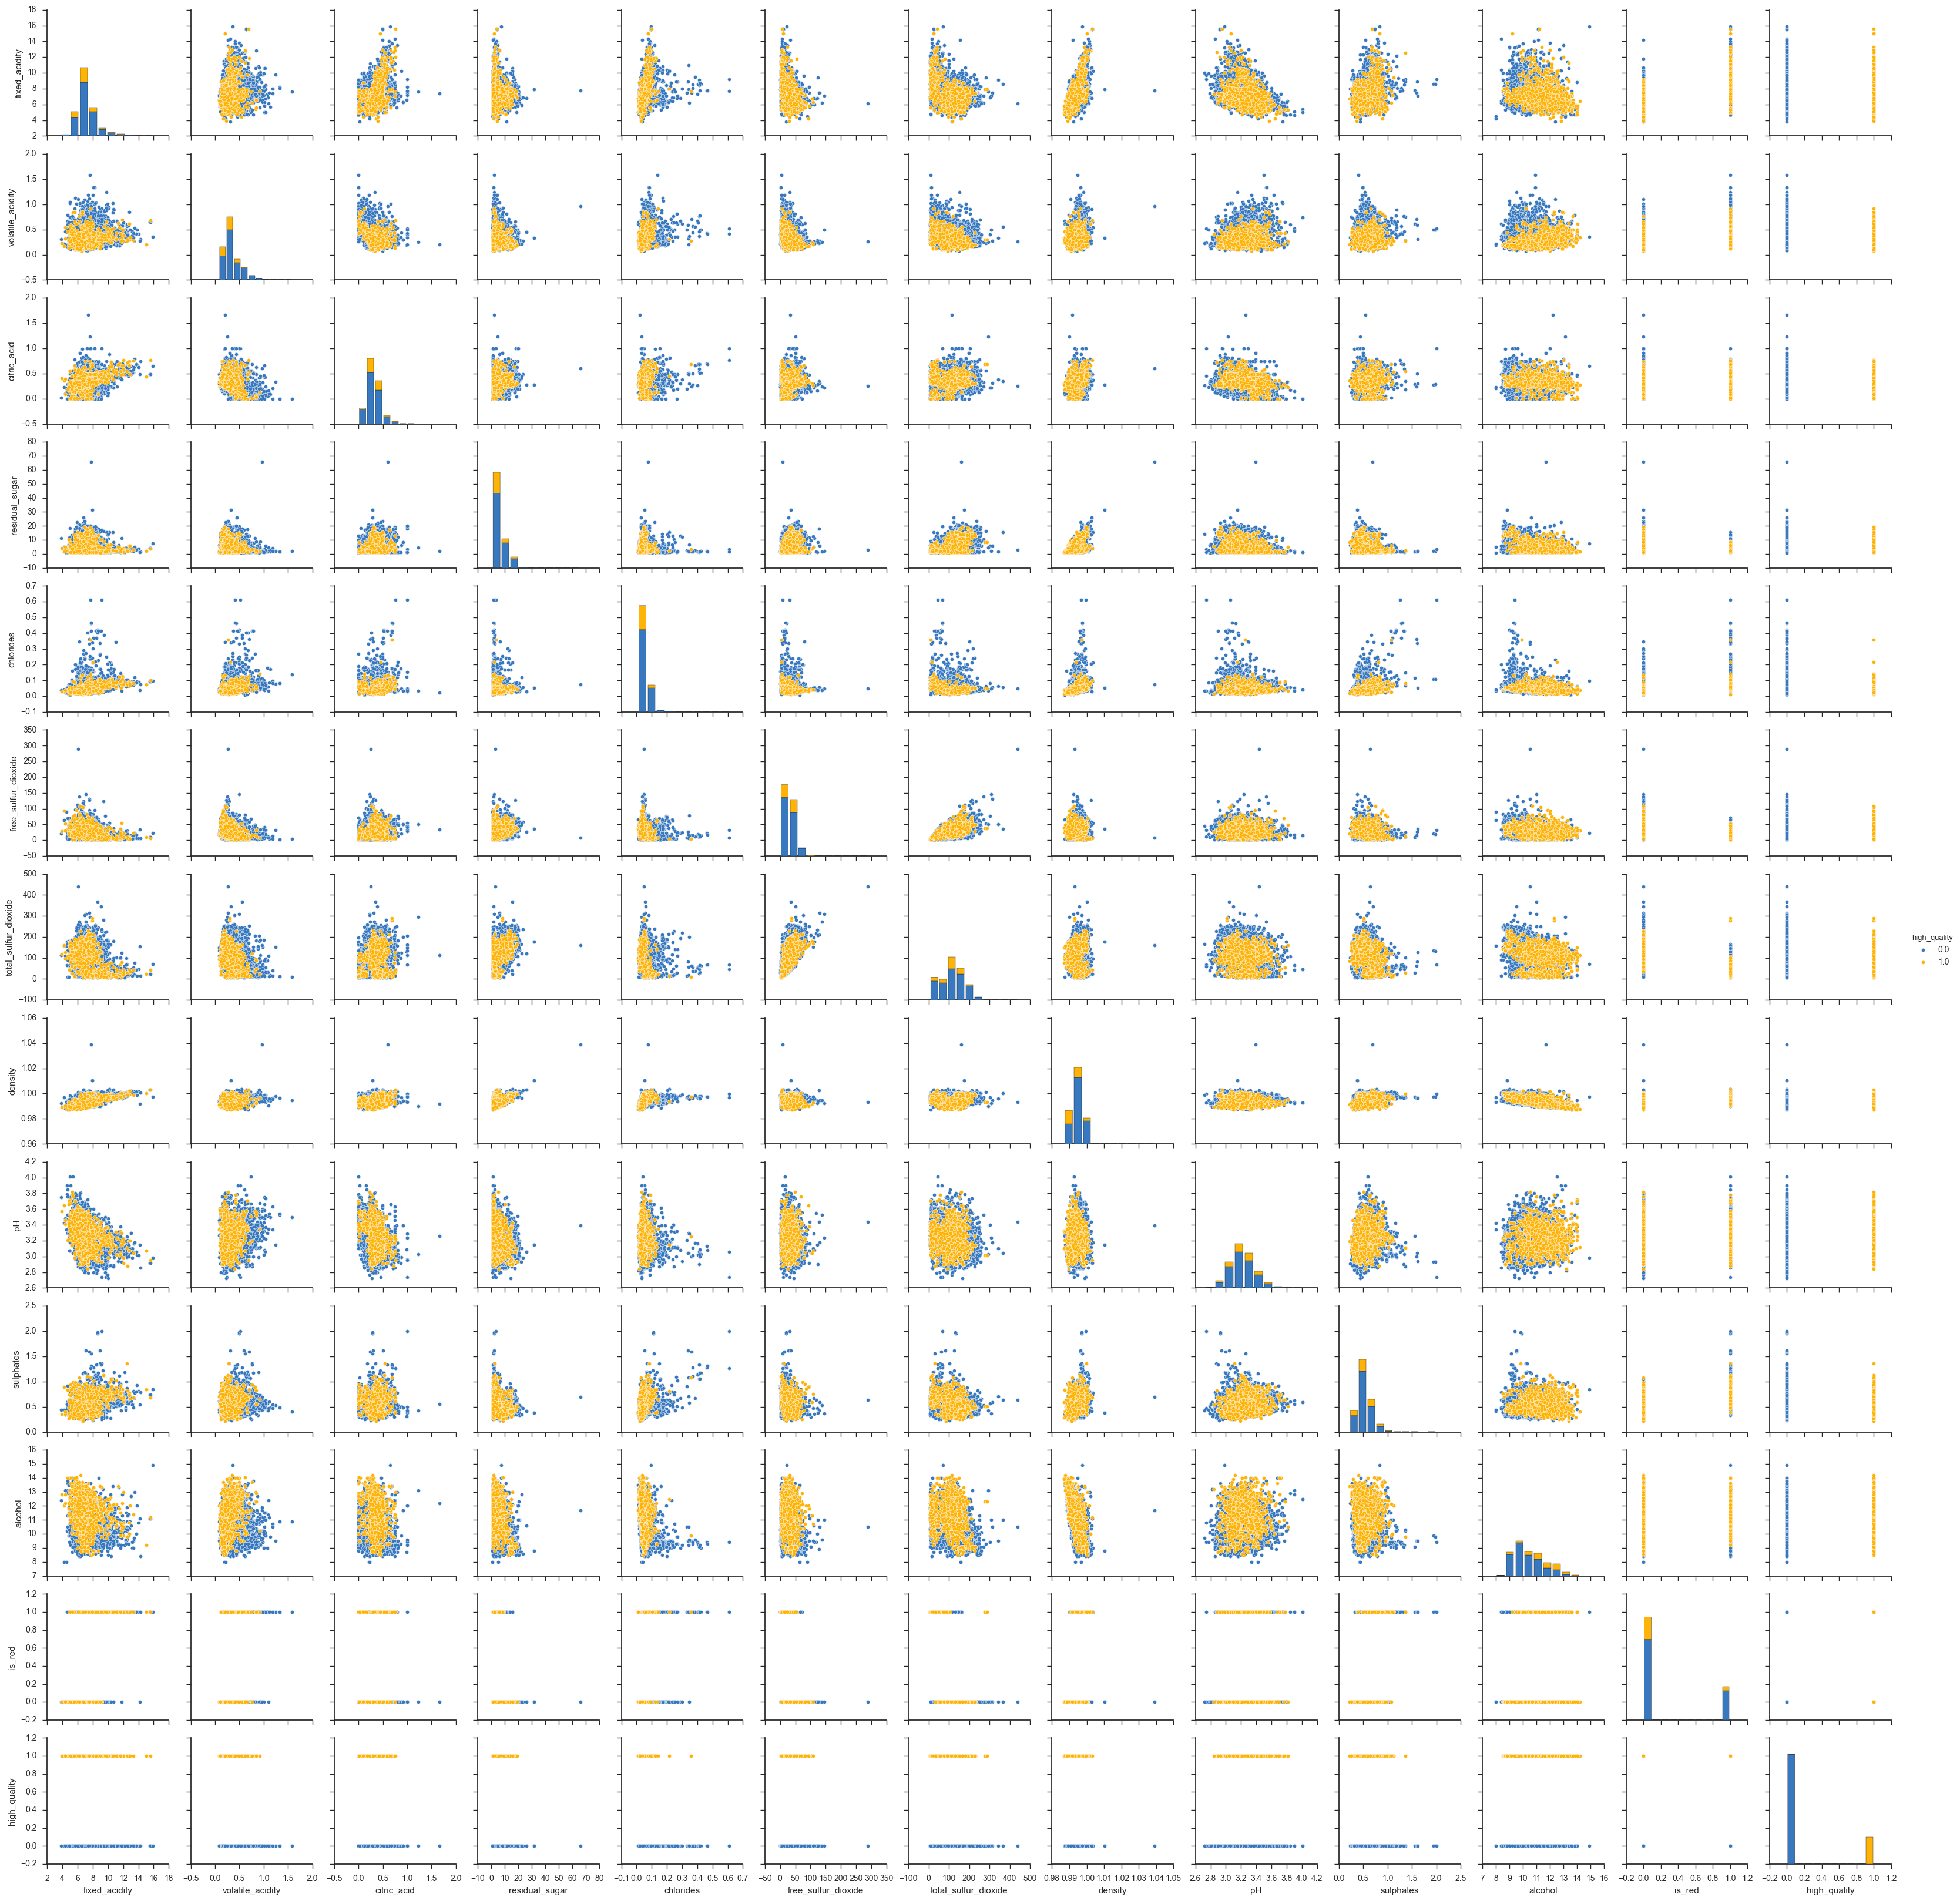

In [60]:
# TODO
sns.set(style="ticks", color_codes=True)
var_pairs = sns.pairplot(df, vars=[x for x in df if x != ['high_quality']], 
                         hue="high_quality", palette=sns.xkcd_palette(['windows blue', 'amber']))

In [61]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,is_red,high_quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,0.486740,-0.049447
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,0.653036,-0.151714
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,-0.187397,0.054444
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.348821,-0.063992
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,0.512678,-0.161781
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,-0.471644,0.014767
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.700357,-0.051226
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,0.390645,-0.275441
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.329129,0.028149
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.487218,0.033971


In [62]:
# TODO

#### Build K-Nearest Neighbors model to predict whether or not a wine is high quality
- Select features you think will be predictive of high quality wines
- Scale the dataset (remember, this is so that each variable contributes equally to the distance computation)
- Evaluate the accuracy of your model using cross-validation
- Evaluate different values of `n` to see how the number of neighbors affects the classification accuracy

In [75]:
print pd.value_counts(df.high_quality)
print len(df['high_quality'])
print 1277/ 6497

0.0    5220
1.0    1277
Name: high_quality, dtype: int64
6497
0


In [63]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

xs = scaler.fit_transform(X)
ys = scaler.fit_transform(Y)

/Users/work/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/work/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [77]:
# TODO
knn = KNeighborsClassifier(n_neighbors=5,
                           weights='uniform',
                           p=2,
                           metric='minkowski')

Y = df['high_quality'].values
X = df[['volatile_acidity', 'chlorides','alcohol']].values

from sklearn import cross_validation
cv_indices = cross_validation.StratifiedKFold(Y, n_folds=5)


from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

xs = scaler.fit_transform(X)
ys = scaler.fit_transform(Y)

/Users/work/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/work/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [78]:
def accuracy_crossvalidator(xs, ys, knn, cv_indices):
    scores = []
    for train_i, test_i in cv_indices:
        X_train = X[train_i, :]
        X_test = X[test_i, :]

        Y_train = Y[train_i]
        Y_test = Y[test_i]

        knn.fit(X_train, Y_train)
        
        acc = knn.score(X_test, Y_test)
        scores.append(acc)
        
        print('Fold accuracy:', acc)
        
    print('Mean CV accuracy:', np.mean(scores))

accuracy_crossvalidator(xs, ys, knn, cv_indices)

('Fold accuracy:', 0.81000000000000005)
('Fold accuracy:', 0.77461538461538459)
('Fold accuracy:', 0.80985373364126256)
('Fold accuracy:', 0.7659738260200154)
('Fold accuracy:', 0.75057736720554269)
('Mean CV accuracy:', 0.78220406229644102)


In [80]:
for i in range(1,11):
    knn_n1 = KNeighborsClassifier(n_neighbors=i,
                                  weights='uniform',
                                  p=2,
                                  metric='minkowski')

    accuracy_crossvalidator(xs, ys, knn_n1, cv_indices)
    
cv_indices = cross_validation.StratifiedKFold(Y, n_folds=5)
accuracy_crossvalidator(xs, ys, knn, cv_indices)

('Fold accuracy:', 0.81384615384615389)
('Fold accuracy:', 0.76923076923076927)
('Fold accuracy:', 0.75904541955350269)
('Fold accuracy:', 0.72902232486528096)
('Fold accuracy:', 0.68514241724403391)
('Mean CV accuracy:', 0.75125741694794812)
('Fold accuracy:', 0.80769230769230771)
('Fold accuracy:', 0.80461538461538462)
('Fold accuracy:', 0.79753656658968441)
('Fold accuracy:', 0.78367975365665898)
('Fold accuracy:', 0.7575057736720554)
('Mean CV accuracy:', 0.79020595724521825)
('Fold accuracy:', 0.80692307692307697)
('Fold accuracy:', 0.78230769230769226)
('Fold accuracy:', 0.77983063895304083)
('Fold accuracy:', 0.76212471131639725)
('Fold accuracy:', 0.72748267898383367)
('Mean CV accuracy:', 0.77173375969680824)
('Fold accuracy:', 0.80461538461538462)
('Fold accuracy:', 0.79692307692307696)
('Fold accuracy:', 0.81370284834488071)
('Fold accuracy:', 0.78829869130100072)
('Fold accuracy:', 0.75673595073133182)
('Mean CV accuracy:', 0.79205519038313488)
('Fold accuracy:', 0.81000000